In [1]:
import pandas as pd
import numpy as np

offical_trainX = pd.read_csv("./data/dengue_features_train.csv")
offical_trainY = pd.read_csv("./data/dengue_labels_train.csv")

pop_sj = 23.50000 # to normalized per 100 000 inhabitants
pop_iq = 5.10000 # to normalized per 100 000 inhabitants

sj_official_trainX= offical_trainX[offical_trainX.city == "sj"]
iq_official_trainX= offical_trainX[offical_trainX.city == "iq"]

sj_len_X=len(sj_official_trainX)
iq_len_X=len(iq_official_trainX)

sj_trainX=sj_official_trainX[:749]
iq_trainX=iq_official_trainX[:416]

sj_testX=sj_official_trainX[749:]
iq_testX=iq_official_trainX[416:]

sj_official_trainY= offical_trainY[offical_trainY.city == "sj"]
iq_official_trainY= offical_trainY[offical_trainY.city == "iq"]

sj_len_Y=len(sj_official_trainY)
iq_len_Y=len(sj_official_trainY)

sj_trainY=sj_official_trainY[:749]
iq_trainY=iq_official_trainY[:416]

sj_testY=sj_official_trainY[749:]
iq_testY=iq_official_trainY[416:]



trainX = pd.concat((sj_trainX, iq_trainX), axis=0)
trainY = pd.concat((sj_trainY, iq_trainY), axis=0)
testX = pd.concat((sj_testX, iq_testX), axis=0)
testY = pd.concat((sj_testY, iq_testY), axis=0)

# trainX.head(),trainY.head()


In [2]:
sj_official_trainY, iq_official_trainY

(    city  year  weekofyear  total_cases
 0     sj  1990          18            4
 1     sj  1990          19            5
 2     sj  1990          20            4
 3     sj  1990          21            3
 4     sj  1990          22            6
 ..   ...   ...         ...          ...
 931   sj  2008          13            4
 932   sj  2008          14            3
 933   sj  2008          15            1
 934   sj  2008          16            3
 935   sj  2008          17            5
 
 [936 rows x 4 columns],
      city  year  weekofyear  total_cases
 936    iq  2000          26            0
 937    iq  2000          27            0
 938    iq  2000          28            0
 939    iq  2000          29            0
 940    iq  2000          30            0
 ...   ...   ...         ...          ...
 1451   iq  2010          21            5
 1452   iq  2010          22            8
 1453   iq  2010          23            1
 1454   iq  2010          24            1
 1455   iq  2010   

In [3]:
#check data alignment
np.corrcoef(np.array(trainX.weekofyear), np.array(trainY.iloc[:,2]))

array([[1., 1.],
       [1., 1.]])

In [4]:
#check duplicates
print(f' trainX duplicates? {trainX.duplicated().unique()}')
print(f' trainY duplicates? {trainY.duplicated().unique()}')

 trainX duplicates? [False]
 trainY duplicates? [False]


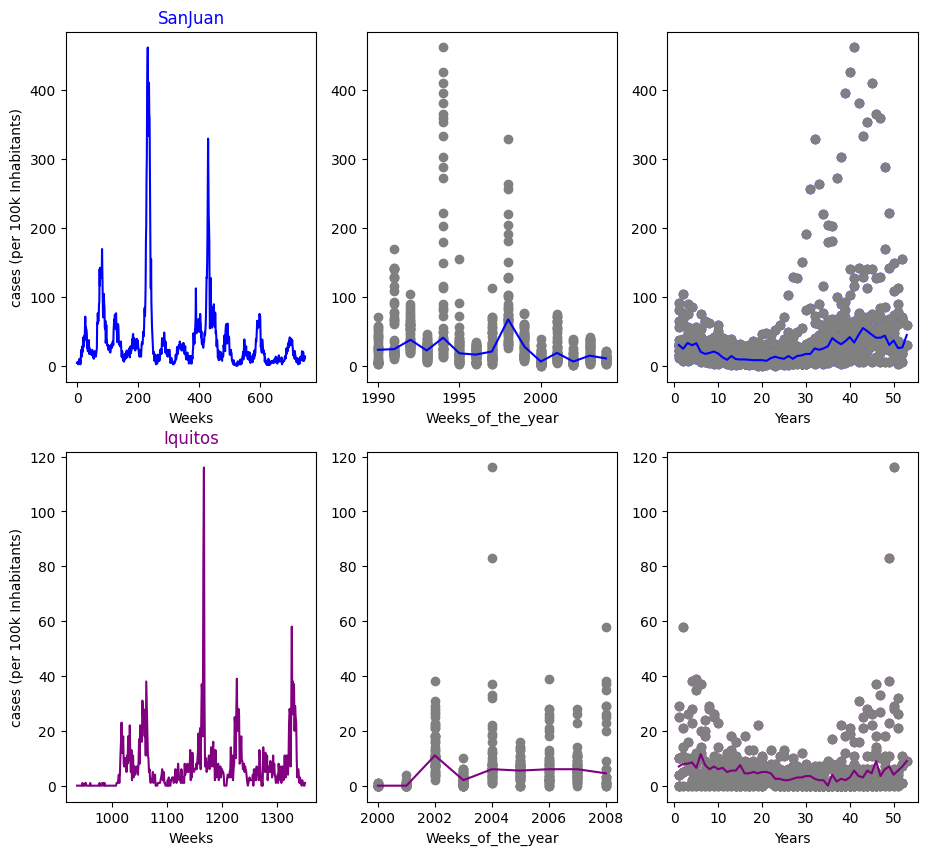

In [14]:
#how did the epidemic evolved over time
#separate plots by city
#numbers normalized by 100k inhabitants

import matplotlib.pyplot as plt
#pop_sj = 23.50000 # to normalized per 100 000 inhabitants
#pop_iq = 5.10000 # to normalized per 100 000 inhabitants
pop_sj = 1 # to normalized per 100 000 inhabitants
pop_iq = 1 # to normalized per 100 000 inhabitants
pops = [pop_sj, pop_iq]
cities = ['SanJuan', 'Iquitos']
cities_data = dict(SanJuan=sj_trainY, Iquitos=iq_trainY)
axes_cit = [[0, 0], [1,0]]
cities_color = ['blue', 'purple']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(11, 10))
for ct in range(len(cities)):
    thisrow = axes_cit[ct][0]
    thiscol = axes_cit[ct][1]
    axs[thisrow, 0].plot(
        cities_data[cities[ct]].iloc[:,3]/pops[ct],
        color=cities_color[ct])

    #plot for the all duration
    axs[thisrow, 2].scatter(
        cities_data[cities[ct]].loc[:,'weekofyear'],
        cities_data[cities[ct]].loc[:,'total_cases']/pops[ct],
        marker='o',
        color=cities_color[ct])

    #plot per year
    axs[thisrow, 1].scatter(
        cities_data[cities[ct]].iloc[:,1],
        cities_data[cities[ct]].iloc[:,3]/pops[ct],
        marker='o',
        color='grey')
    axs[thisrow, 1].plot(
        cities_data[cities[ct]].groupby('year')['total_cases'].median().index,
        cities_data[cities[ct]].groupby('year')['total_cases'].median()/pops[ct], 
        color=cities_color[ct])
    
    #plot per week of the year
    axs[thisrow, 2].scatter(
        cities_data[cities[ct]].loc[:,'weekofyear'],
        cities_data[cities[ct]].loc[:,'total_cases']/pops[ct],
        marker='o',
        color='grey')
    axs[thisrow, 2].plot(
        cities_data[cities[ct]].groupby('weekofyear')['total_cases'].median().index,
        cities_data[cities[ct]].groupby('weekofyear')['total_cases'].median()/pops[ct], 
        color=cities_color[ct])

    axs[thisrow, 0].set_ylabel('cases (per 100k Inhabitants)')
    axs[thisrow, 0].set_title(cities[ct], color=cities_color[ct])
    axs[thisrow, 0].set_xlabel('Weeks')
    axs[thisrow, 2].set_xlabel('Years')
    axs[thisrow, 1].set_xlabel('Weeks_of_the_year')   

plt.savefig('Epidemic_Evolution_0ver_time.png', orientation='landscape', transparent=False)


There is a clear yearly seasonality in San Juan but it is not as obvious in Iquitos \
Season clearly matters, the epidemics seems to vary with seasons (more in summer)

In [6]:
trainX.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1165.0,1999.517597,4.933309,1990.000000,1995.000000,2001.000000,2003.000000,2008.000000
weekofyear,1165.0,26.507296,14.888162,1.000000,14.000000,27.000000,39.000000,53.000000
ndvi_ne,1007.0,0.152329,0.134696,-0.406250,0.056800,0.140100,0.253995,0.493400
ndvi_nw,1120.0,0.140718,0.110903,-0.252800,0.064575,0.131486,0.218496,0.437100
ndvi_se,1145.0,0.205737,0.072667,-0.015533,0.158243,0.196786,0.251143,0.473400
ndvi_sw,1145.0,0.203754,0.082442,-0.063457,0.147957,0.190771,0.247029,0.546017
precipitation_amt_mm,1155.0,45.499697,44.113753,0.000000,9.515000,37.990000,70.055000,390.600000
reanalysis_air_temp_k,1158.0,298.632193,1.323282,294.635714,297.626071,298.582857,299.780000,301.637143
reanalysis_avg_temp_k,1158.0,299.156384,1.230883,294.892857,298.216071,299.232143,300.121429,302.928571
reanalysis_dew_point_temp_k,1158.0,295.185348,1.515125,289.642857,294.053214,295.567857,296.397143,297.852857


In [7]:
#how many nans per columns
trainX.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  158
ndvi_nw                                   45
ndvi_se                                   20
ndvi_sw                                   20
precipitation_amt_mm                      10
reanalysis_air_temp_k                      7
reanalysis_avg_temp_k                      7
reanalysis_dew_point_temp_k                7
reanalysis_max_air_temp_k                  7
reanalysis_min_air_temp_k                  7
reanalysis_precip_amt_kg_per_m2            7
reanalysis_relative_humidity_percent       7
reanalysis_sat_precip_amt_mm              10
reanalysis_specific_humidity_g_per_kg      7
reanalysis_tdtr_k                          7
station_avg_temp_c                        36
station_diur_temp_rng_c                   36
station_max_temp_c                        14
station_mi

In [8]:
#getting rid of rows with nans
# trainX = trainX.dropna()
# trainY = trainY.loc[trainX.index]
# target = trainY.iloc[:,3]
# print(trainX.isnull().any().any())
# print(trainY.isnull().any().any())
# print(f'trainX shape: {trainX.shape} - trainY shape: {trainY.shape}')

In [22]:
data_select_col = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer 
from sklearn.impute import SimpleImputer, KNNImputer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
import seaborn as sns

all_numerical_features = trainX.select_dtypes(include = ['int64', 'float64']).columns
all_categorical_features = trainX.select_dtypes(include = [object, 'datetime64']).columns

numerical_features = [value for value in all_numerical_features if value in data_select_col]
categorical_features = [value for value in all_categorical_features if value in data_select_col]
categorical_features, numerical_features
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)), 
    ('scaler', StandardScaler())])
#Quantile encoding for categorical columns
#cat_enc = ce.count.CountEncoder()
# cat_enc = ce.QuantileEncoder()
# cat_enc = ce.hashing.HashingEncoder() ### NONONO 
# cat_enc = ce.james_stein.JamesSteinEncoder()
# cat_enc = ce.target_encoder.TargetEncoder()
cat_enc = ce.one_hot.OneHotEncoder()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', cat_enc)])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features),
                  ('cat', categorical_transformer, categorical_features)], 
    remainder='passthrough' # to let everything not trasnformed go through
)


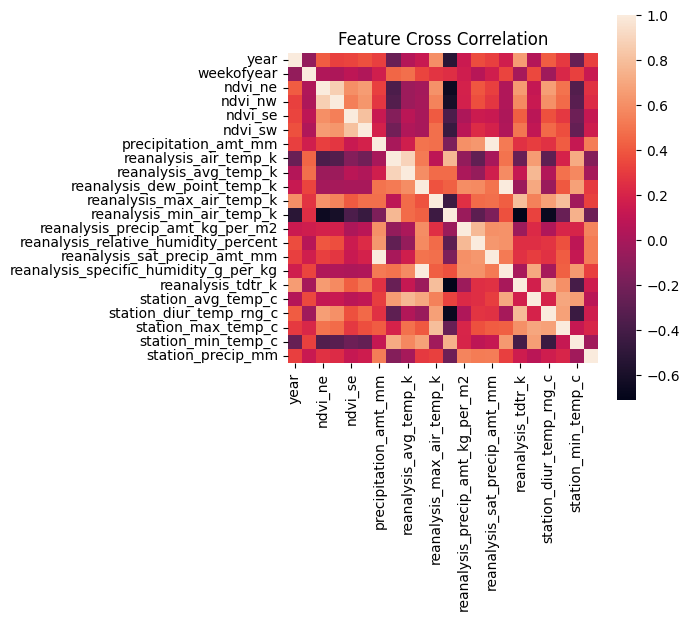

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
cc_map = sns.heatmap(trainX.corr(method='spearman',numeric_only=True), ax=ax)
# SellerG and CouncilArea are quite correlated
# Type and Room are quite correlated
ax.set_title('Feature Cross Correlation')
ax.set_aspect('equal')
plt.savefig('CrossCorrelationMatrix_AllNumFeatures.png', orientation='landscape', transparent=False)

plt.show()

HistGradientBoostingRegressor()
TRAIN - MAE =  4.046981000851157
TEST - MAE =  14.445387345406438


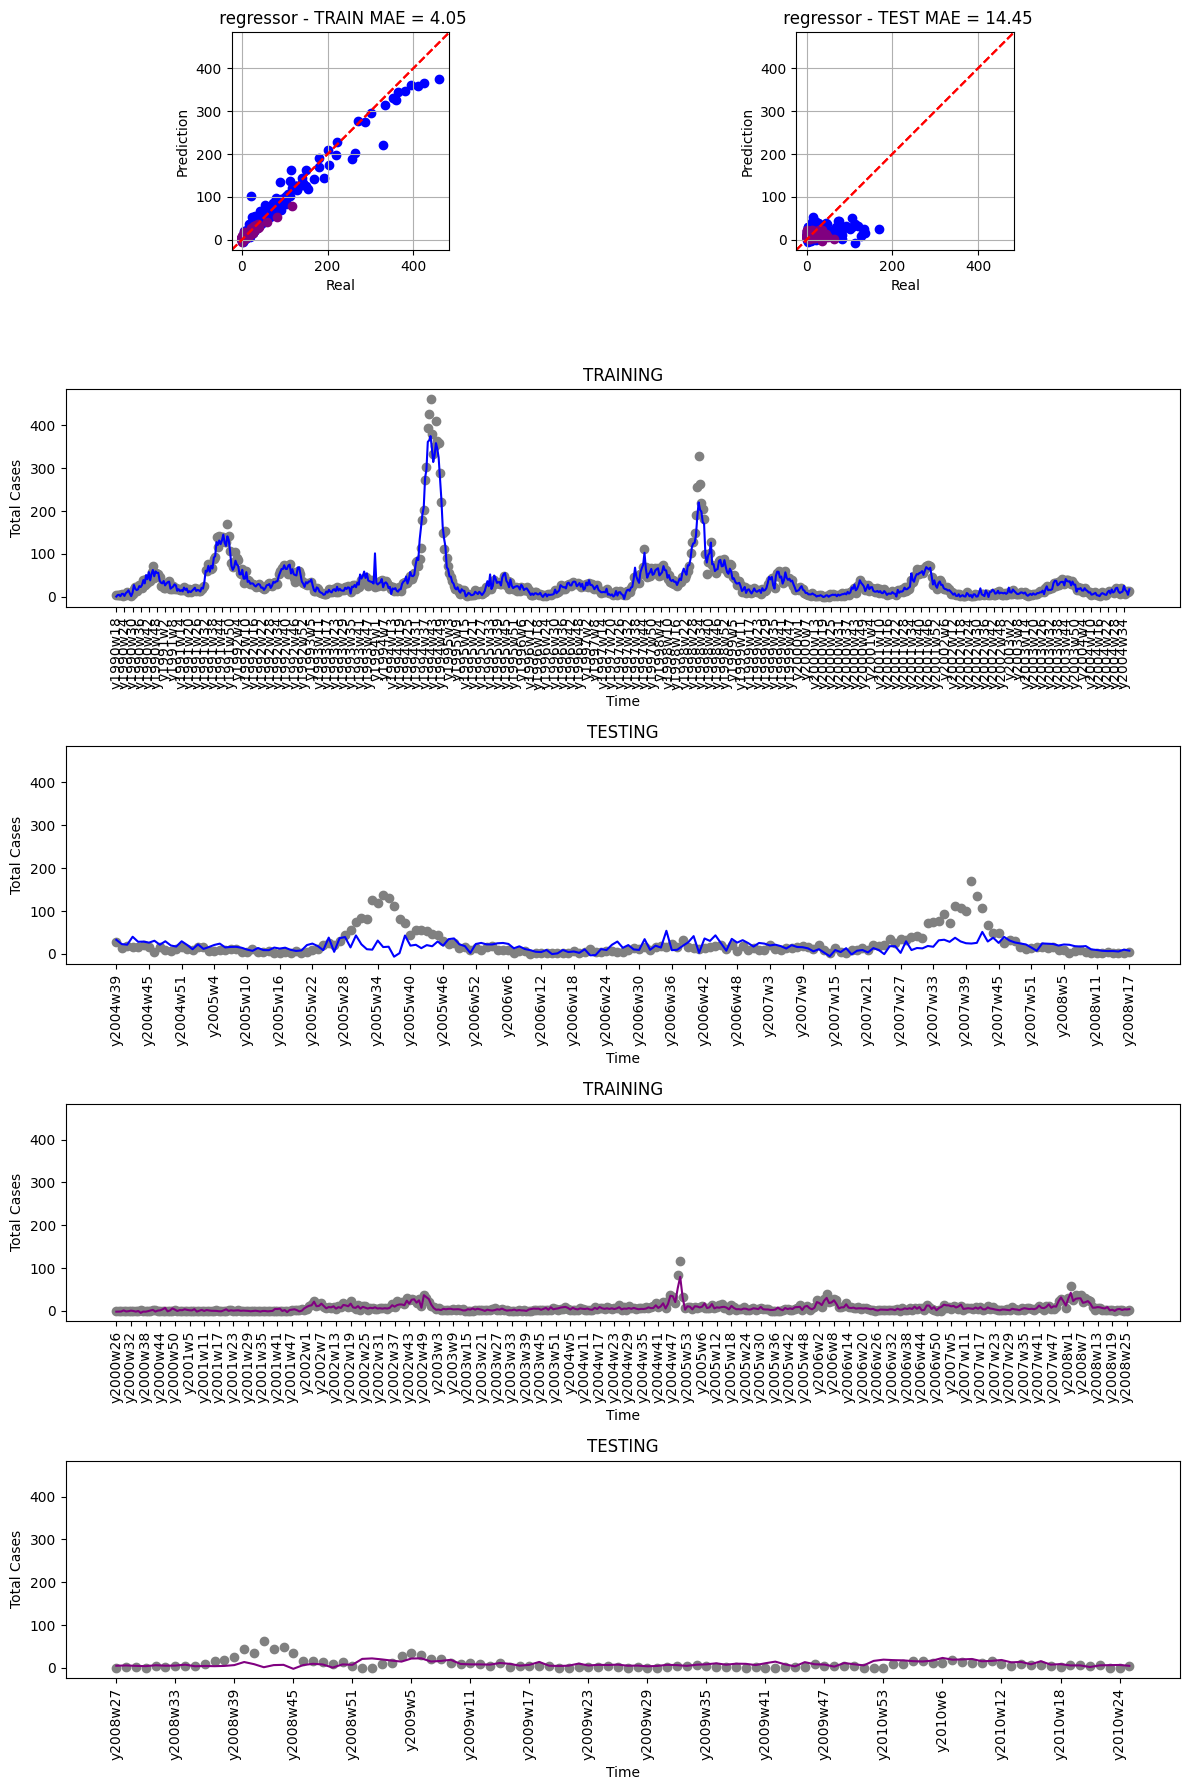

KNeighborsRegressor(n_neighbors=3)
TRAIN - MAE =  14.301573676680972
TEST - MAE =  14.33562428407789


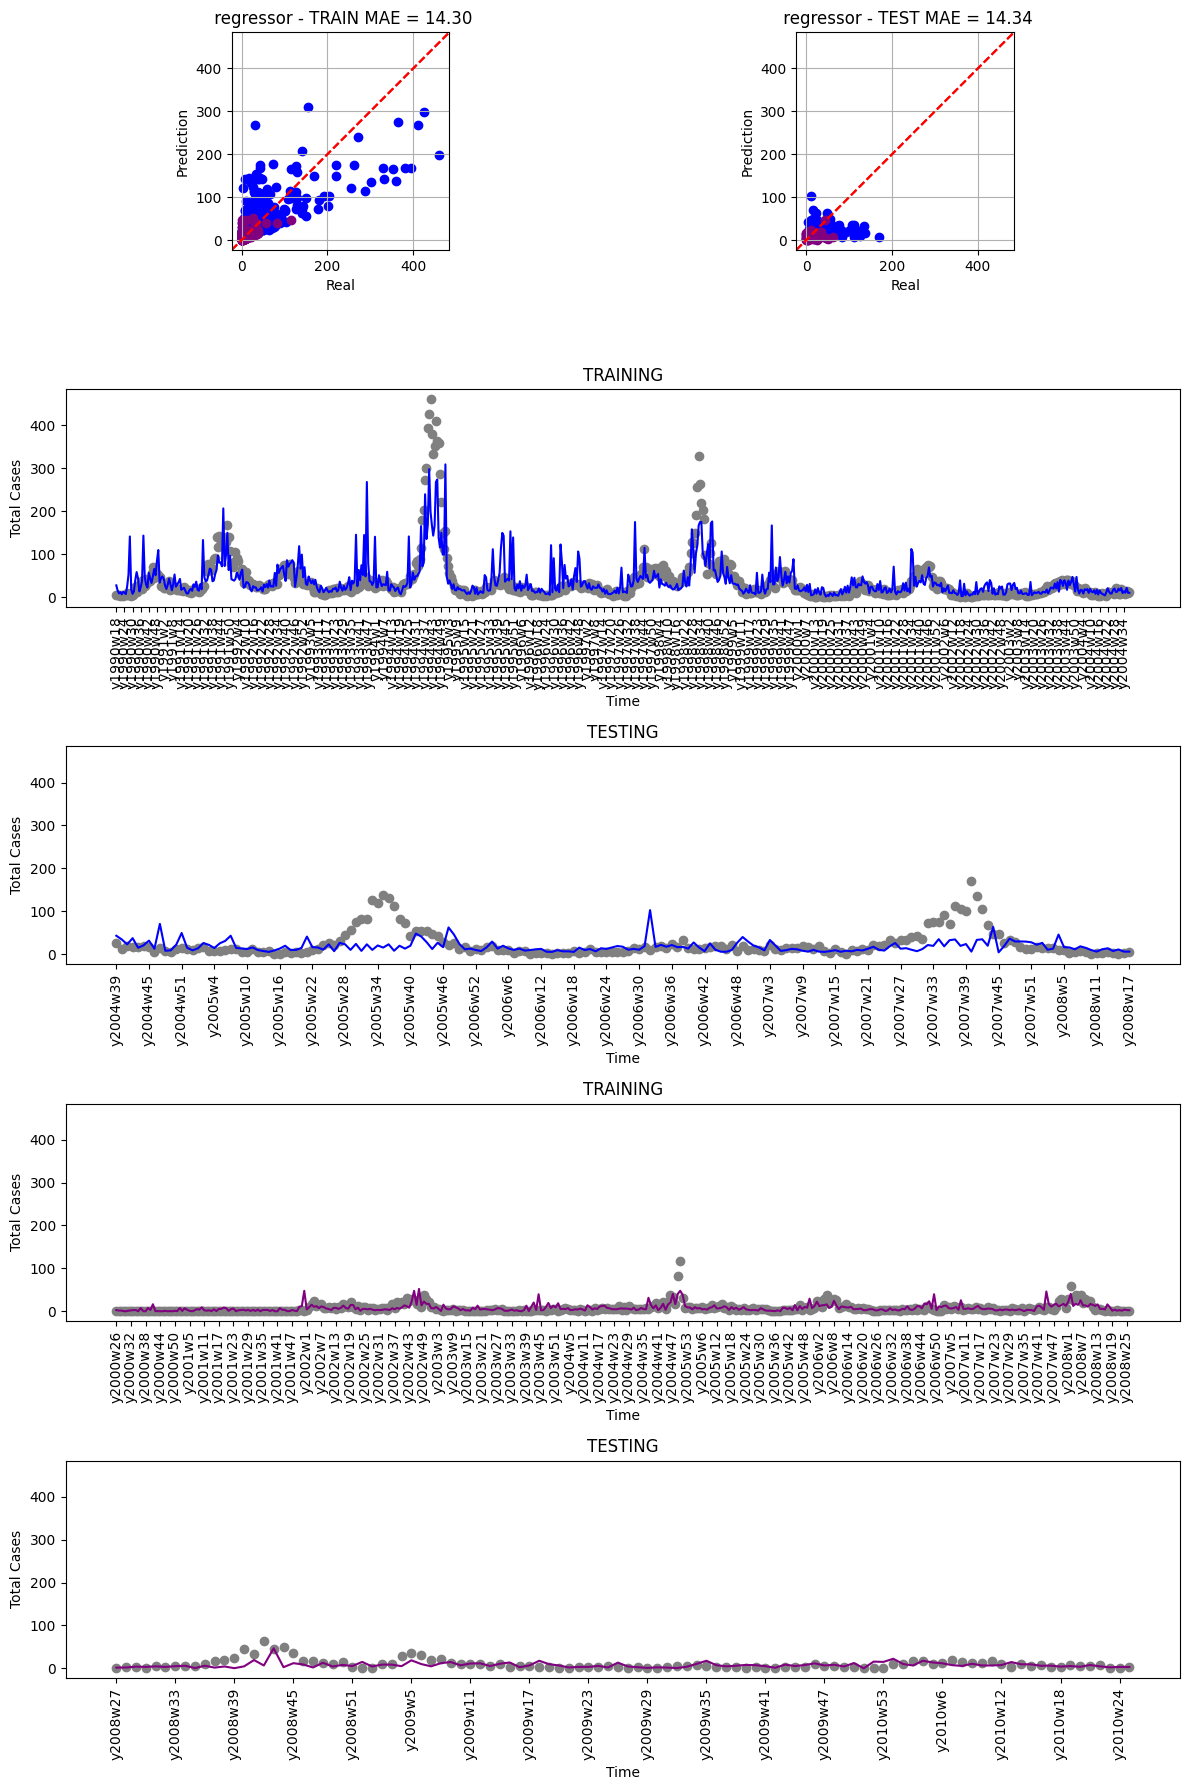

In [27]:

#import packages
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
# from sklearn.neural_network import MLPRegressor

regressors = [
    # Ridge(),
    # ElasticNet(),
    # Lasso(),
    # DecisionTreeRegressor(),
    ExtraTreeRegressor(),    
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    # LinearSVR(), 
    # HistGradientBoostingRegressor(),
    KNeighborsRegressor(n_neighbors=4),
    ]

Y_train = trainY.loc[:,'total_cases']
Y_test = testY.loc[:,'total_cases']

pop_sj = 23.50000 # to normalized per 100 000 inhabitants
pop_iq = 5.10000 # to normalized per 100 000 inhabitants
pops = [pop_sj, pop_iq]
cities = ['sj', 'iq']
axes_cit = [[0, 0], [1,0]]
cities_color = ['blue', 'purple']

for regressor in regressors:
    #model pipeline
    print(regressor)
    reg_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', regressor)]
    )
    # print(lin_reg_pipe)
    
    reg_pipe.fit(trainX.loc[:,data_select_col], Y_train)
    y_pred = reg_pipe.predict(testX.loc[:,data_select_col])
    y_train_pred = reg_pipe.predict(trainX.loc[:,data_select_col])
    # print('Mean Abs Percentage error = ', mean_absolute_percentage_error(y_test, y_pred))
    print(f'TRAIN - MAE =  {mean_absolute_error(Y_train, y_train_pred)}')
    print(f'TEST - MAE =  {mean_absolute_error(Y_test, y_pred)}')
    # print('TEST - Explained Variance = %.3f' % explained_variance_score(testY, y_pred))
    # print('Rˆ2 = ' ,r2_score(y_test, y_pred))
    # ct.fit_transform(ce_target.fit_transform(X_train, y_train), y_train)

    fig = plt.subplots(figsize=(12,18))
    
    for ct in range(len(cities)):
            
        #train
        city_data_log_train = trainY.loc[:,'city']==cities[ct]
        year_train = trainY.loc[city_data_log_train,'year']
        week_train = trainY.loc[city_data_log_train,'weekofyear']
        # print(zip(np.array(year), np.array(week)))
        time_train=[f'y{y}w{w}' for y, w in zip(np.array(year_train), np.array(week_train))]

        #test
        city_data_log = testY.loc[:,'city']==cities[ct]
        year_test = testY.loc[city_data_log,'year']
        week_test = testY.loc[city_data_log,'weekofyear']
        # print(zip(np.array(year), np.array(week)))
        time_test=[f'y{y}w{w}' for y, w in zip(np.array(year_test), np.array(week_test))]

        # real Y versus prediction Y on TRAIN X
        ax_1_t = plt.subplot(5,2,1)
        ax_1_t.scatter(
            Y_train[city_data_log_train], y_train_pred[city_data_log_train], 
            marker='o', 
            color=cities_color[ct])
        ax_1 = plt.subplot(5,1,2+ct*2)
        ax_1.scatter(time_train, np.array(Y_train[city_data_log_train]), marker='o',color='grey')
        ax_1.plot(time_train, y_train_pred[city_data_log_train], color=cities_color[ct])
        ax_1.set_ylabel('Total Cases')
        ax_1.set_xlabel('Time')
        ax_1.set_title('TRAINING')
        x_ti = [time_train[l] for l in range(0,len(time_train),6)]
        ax_1.set_xticks(x_ti) 
        ax_1.set_xticklabels(x_ti,
            rotation='vertical')
            
        # real Y versus prediction Y on TEST X
        ax_1_tt = plt.subplot(5,2,2)
        ax_1_tt.scatter(
            Y_test[city_data_log], y_pred[city_data_log], 
            marker='o', 
            color=cities_color[ct])

        ax_2 = plt.subplot(5,1,3+ct*2)
        ax_2.scatter(time_test, np.array(Y_test[city_data_log]), marker='o',color='grey')
        ax_2.plot(time_test, y_pred[city_data_log], color=cities_color[ct])
        ax_2.set_ylabel('Total Cases')
        ax_2.set_xlabel('Time')
        ax_2.set_title('TESTING')
        x_ti = [time_test[l] for l in range(0,len(time_test),6)]
        ax_2.set_xticks(x_ti) 
        ax_2.set_xticklabels(x_ti,
            rotation='vertical')
        # ax1[1+ct].xticks(rotation='vertical')
  


    axlims = []
    [axlims.append(a) for a in ax_1_t.get_xlim()];
    [axlims.append(a) for a in ax_1_t.get_ylim()];
    [axlims.append(a) for a in ax_1_tt.get_xlim()];
    [axlims.append(a) for a in ax_1_tt.get_ylim()];

    ax_1_t.set_xlim(min(axlims), max(axlims))
    ax_1_t.set_ylim(min(axlims), max(axlims))
    line = [[min(axlims), min(axlims)],
        [max(axlims), max(axlims)]]
    ax_1_t.plot(line, line, linestyle='--', color='red')
    ax_1_t.grid(True)
    ax_1_t.set_aspect('equal')
    ax_1_t.set_ylabel('Prediction')
    ax_1_t.set_xlabel('Real')
    title = (f' regressor - TRAIN MAE = %.2f' % mean_absolute_error(Y_train, y_train_pred))
    ax_1_t.set_title(title)
    ax_1_t.set_ylim(min(axlims), max(axlims))

    ax_1_tt.set_xlim(min(axlims), max(axlims))
    ax_1_tt.set_ylim(min(axlims), max(axlims))
    line = [[min(axlims), min(axlims)],
        [max(axlims), max(axlims)]]
    ax_1_tt.plot(line, line, linestyle='--', color='red')
    ax_1_tt.grid(True)
    ax_1_tt.set_aspect('equal')
    ax_1_tt.set_ylabel('Prediction')
    ax_1_tt.set_xlabel('Real')
    title = (f' regressor - TEST MAE = %.2f' % mean_absolute_error(Y_test, y_pred))
    # print('TEST - Explained Variance = %.3f' % explained_variance_score(y_test, y_pred))
    ax_1_tt.set_title(title)
    ax_1_tt.set_ylim(min(axlims), max(axlims))

    for ct in range(len(cities)):
        ax_1 = plt.subplot(5,1,2+ct*2)
        ax_1.set_ylim(min(axlims), max(axlims))
        ax_2 = plt.subplot(5,1,3+ct*2)
        ax_2.set_ylim(min(axlims), max(axlims))

    plt.tight_layout()
    plt.savefig(f'fit_prediction_vs_real_{regressor}.png', orientation='landscape', transparent=False)
    plt.show()

